In [6]:
import pandas as pd

DATA_PATH = '/home/kshipra/work/major/ml experiments/data/manually_combined.xlsx'

eos = pd.read_excel(DATA_PATH, sheet_name='all_stacked_eos')
sentinel = pd.read_excel(DATA_PATH, sheet_name='all_stacked_sentinel')
combined = pd.read_excel(DATA_PATH, sheet_name='eos_sent_combined')

len(eos), len(sentinel), len(combined)

(747, 796, 747)

In [7]:
import tensorflow as tf

# Only EOS

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  90%|████████▉ | 899/1000 [01:14<00:08, 12.01epoch/s, loss=0.5790, val_loss=1.9014] 



--------- TRAINING LOWER MODEL -----------



Epochs:   8%|▊         | 82/1000 [00:07<01:21, 11.21epoch/s, loss=0.5091, val_loss=0.5883]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/stepWARNING:tensorflow:5 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x72d61017af20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


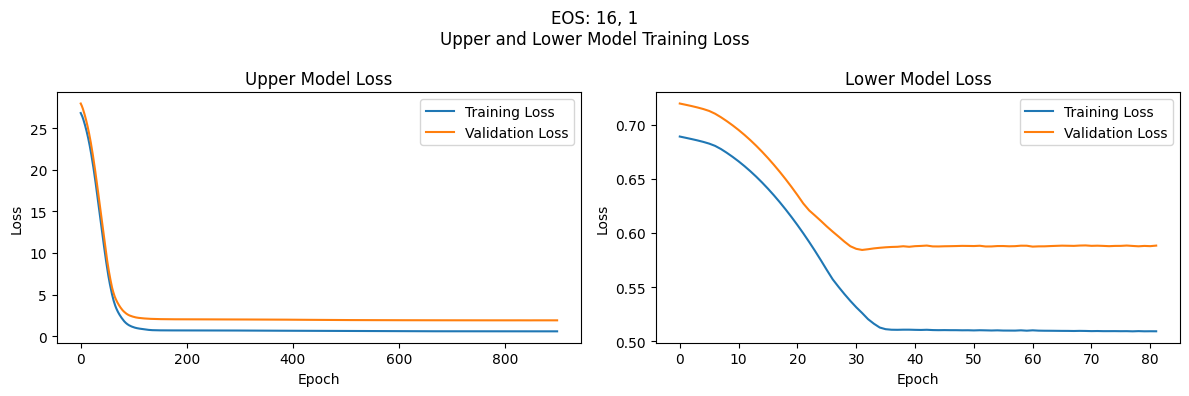

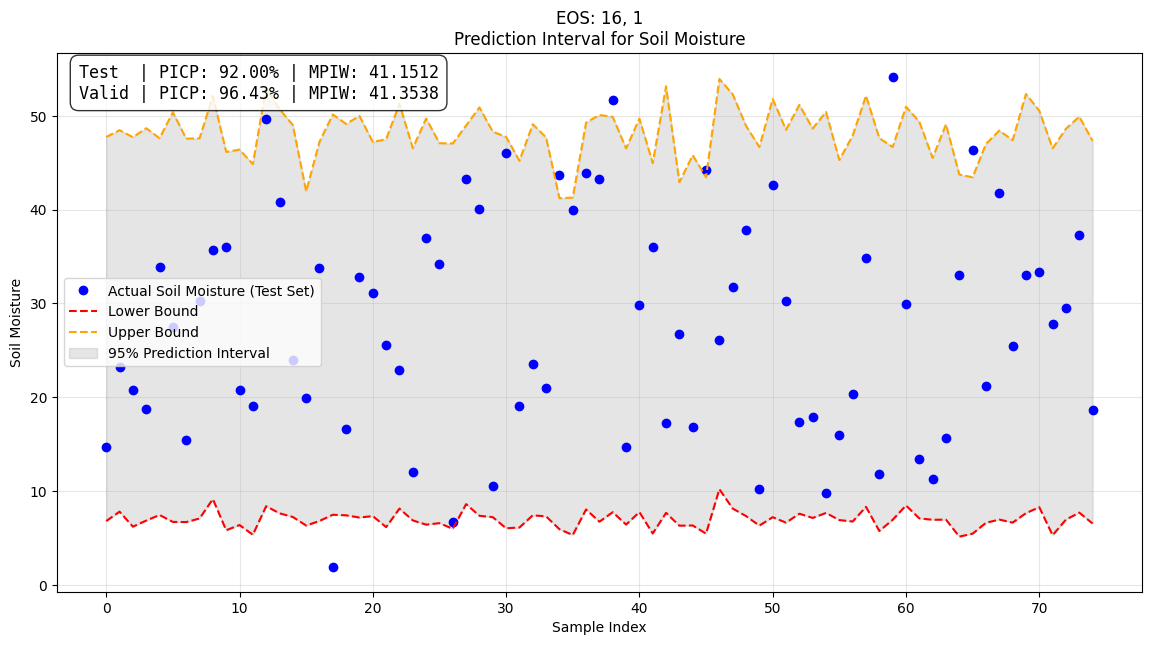

In [8]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='16, 1', optimizer=optimizer, epochs=1000)

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  78%|███████▊  | 782/1000 [01:05<00:18, 11.98epoch/s, loss=0.5955, val_loss=1.9154]  



--------- TRAINING LOWER MODEL -----------



Epochs:   5%|▌         | 54/1000 [00:04<01:25, 11.05epoch/s, loss=0.5041, val_loss=0.5928]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepWARNING:tensorflow:5 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x72d610586020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


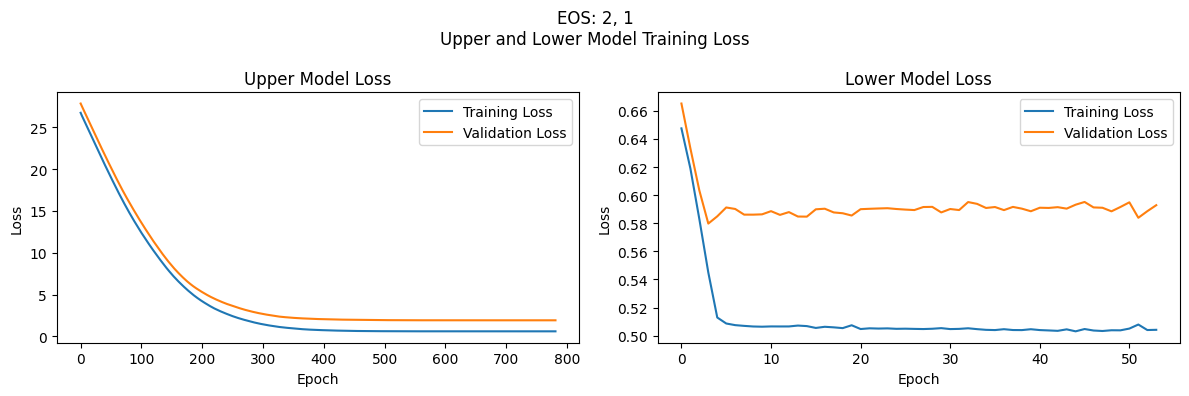

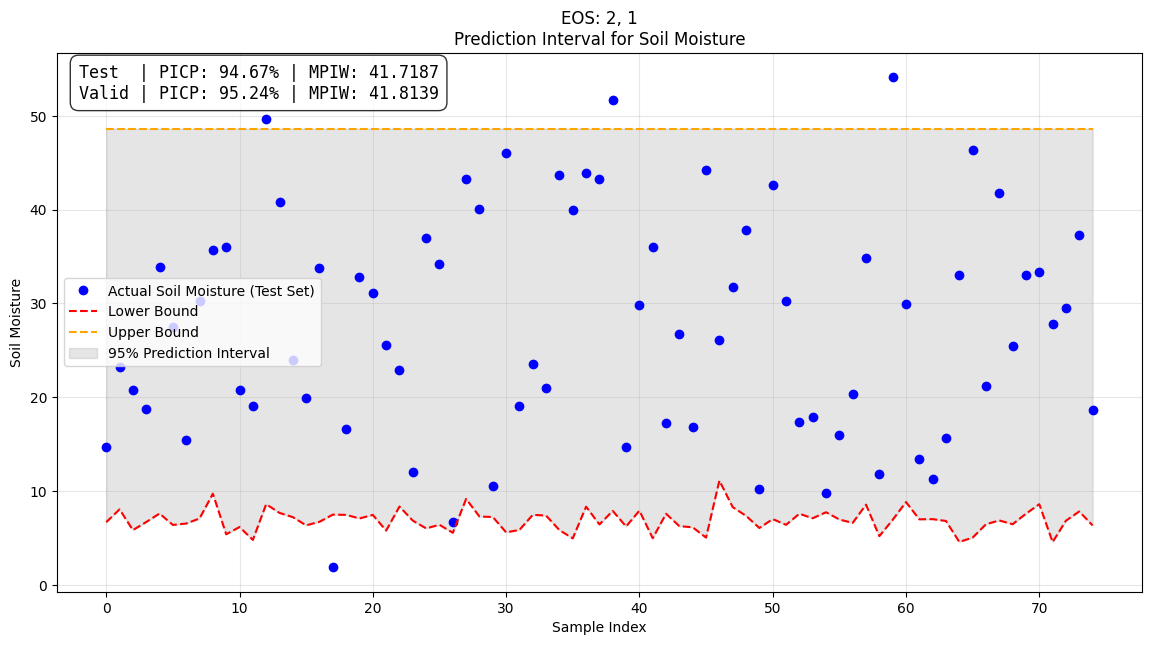

In [9]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='2, 1', epochs=1000)

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  76%|███████▋  | 765/1000 [01:04<00:19, 11.92epoch/s, loss=0.5955, val_loss=1.9154]  



--------- TRAINING LOWER MODEL -----------



Epochs:   6%|▌         | 55/1000 [00:04<01:25, 11.03epoch/s, loss=0.5061, val_loss=0.5870]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


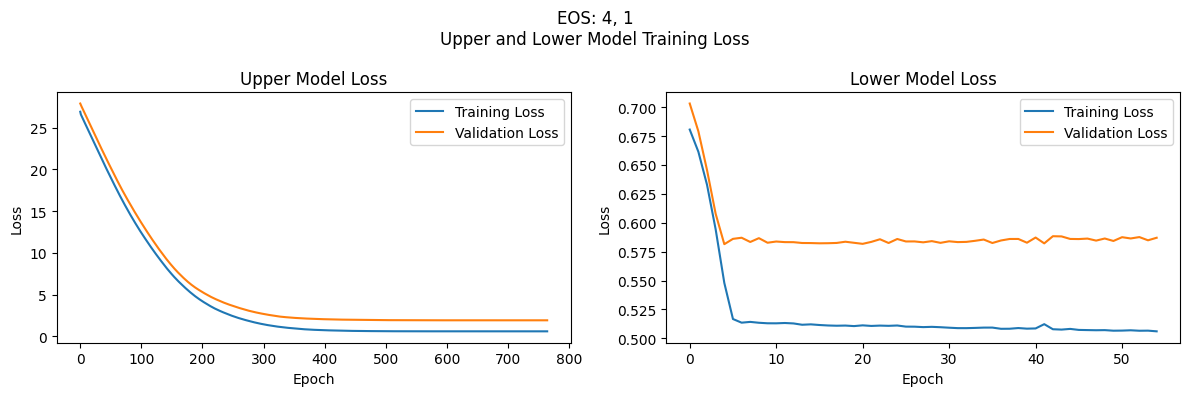

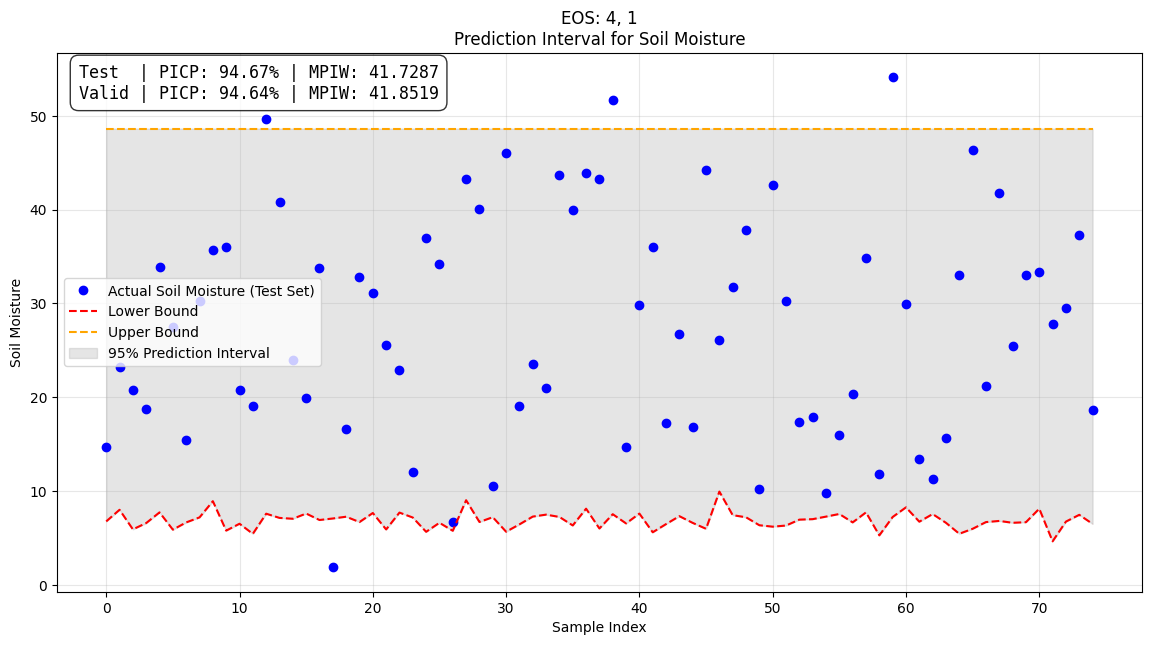

In [10]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='4, 1', epochs=1000)

Training set: 504 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (504, 2)
X_test shape:  (75, 2)
y_train shape: (504,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  43%|████▎     | 429/1000 [00:36<00:48, 11.88epoch/s, loss=0.5806, val_loss=1.8978]



--------- TRAINING LOWER MODEL -----------



Epochs:   6%|▌         | 55/1000 [00:05<01:27, 10.86epoch/s, loss=0.5045, val_loss=0.5923]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


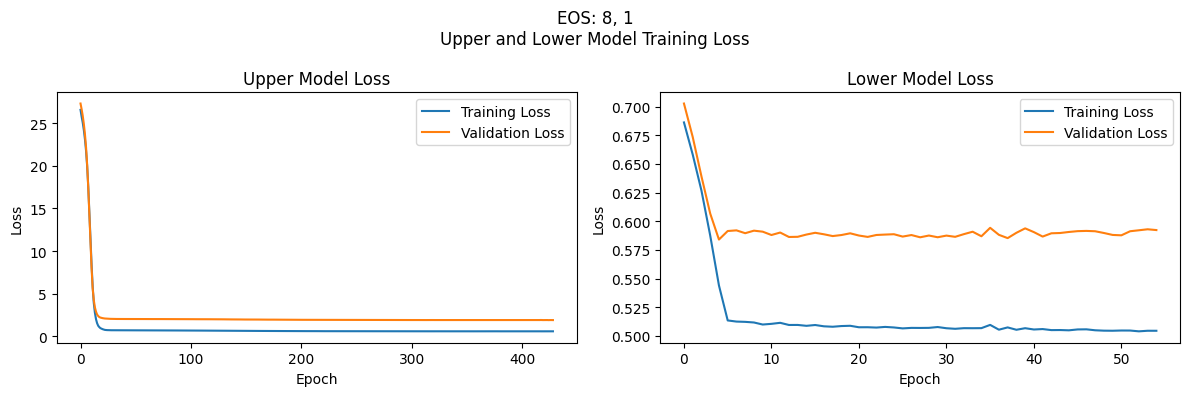

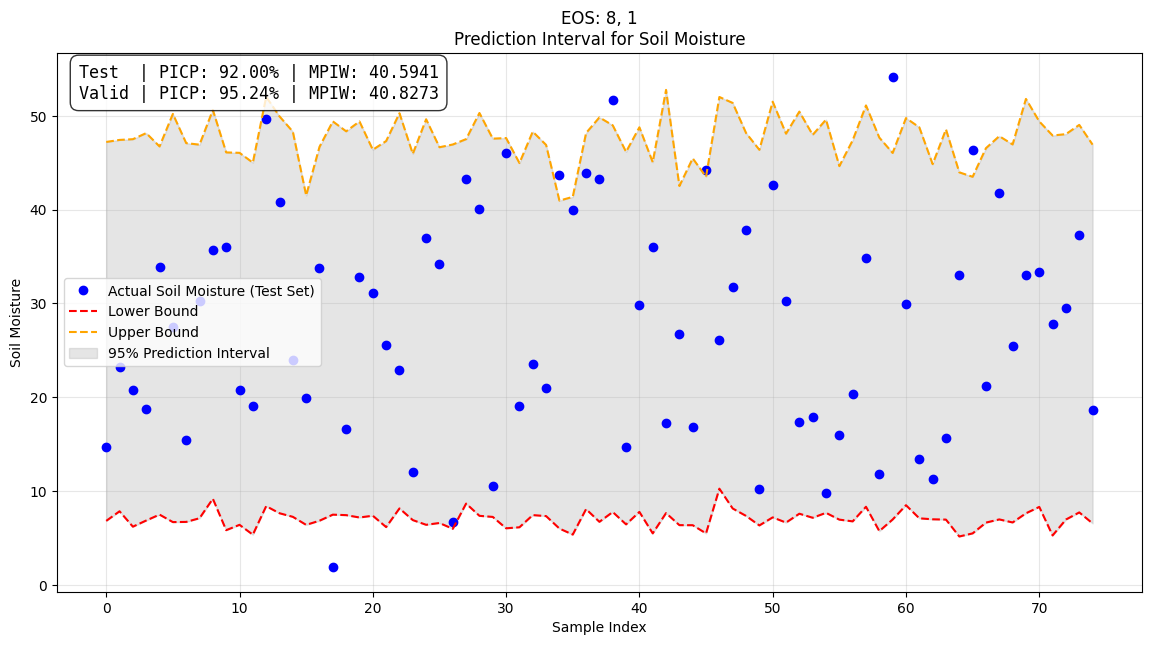

In [11]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(eos, features=['HH', 'HV'], target='SM', satellite='EOS')
exp.run_experiment(model, model_param_string='8, 1', epochs=1000)

# Sentinel Only

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples
X_train shape: (537, 2)
X_test shape:  (80, 2)
y_train shape: (537,)
y_test shape:  (80,)

--------- TRAINING UPPER MODEL -----------



Epochs: 100%|██████████| 1000/1000 [01:24<00:00, 11.78epoch/s, loss=1.0201, val_loss=0.5542]



--------- TRAINING LOWER MODEL -----------



Epochs:   8%|▊         | 83/1000 [00:07<01:21, 11.24epoch/s, loss=0.5535, val_loss=0.5545]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


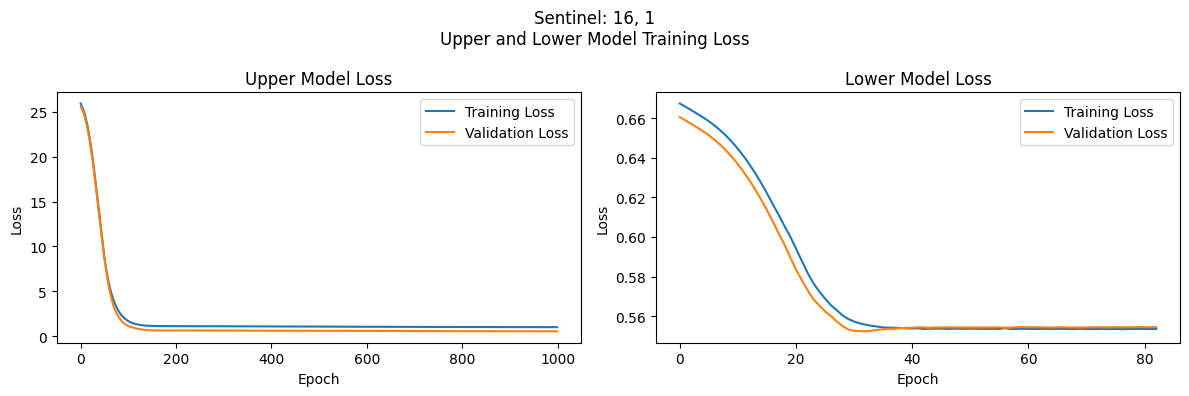

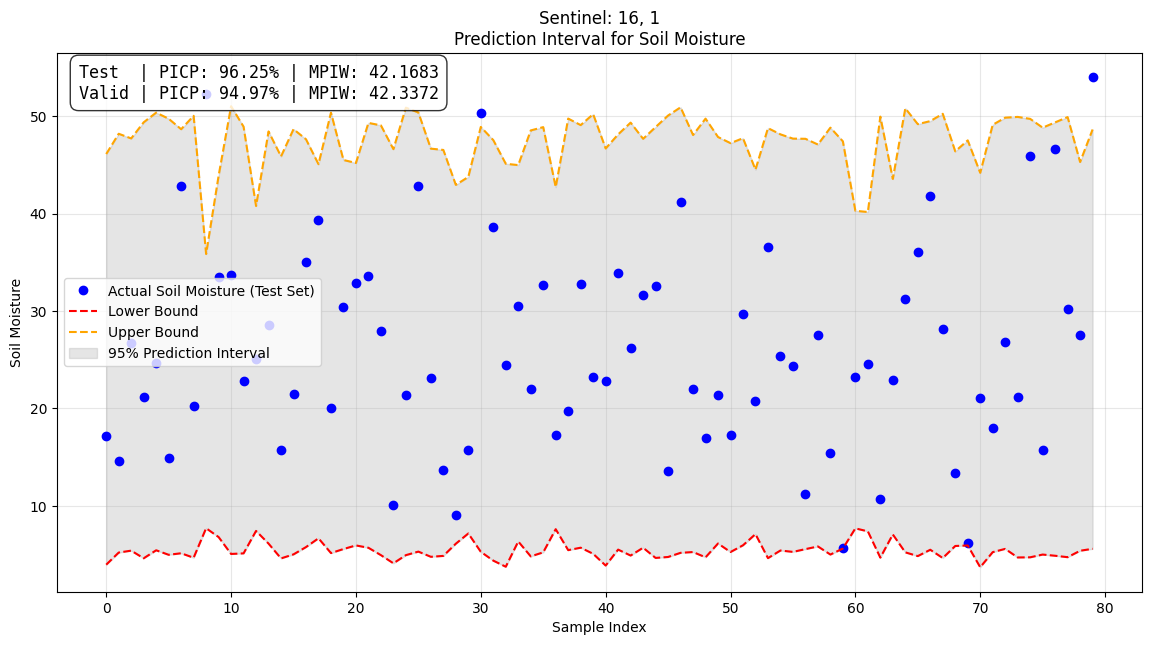

In [12]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

exp = PredictionIntervalEstimation(sentinel, features=['VH', 'VV'], target='SM', satellite='Sentinel')
exp.run_experiment(model, model_param_string='16, 1', optimizer=optimizer, epochs=1000)

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples
X_train shape: (537, 2)
X_test shape:  (80, 2)
y_train shape: (537,)
y_test shape:  (80,)

--------- TRAINING UPPER MODEL -----------



Epochs:  52%|█████▎    | 525/1000 [00:44<00:40, 11.67epoch/s, loss=1.0307, val_loss=0.5685]



--------- TRAINING LOWER MODEL -----------



Epochs:   6%|▌         | 56/1000 [00:05<01:29, 10.55epoch/s, loss=0.5532, val_loss=0.5547]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


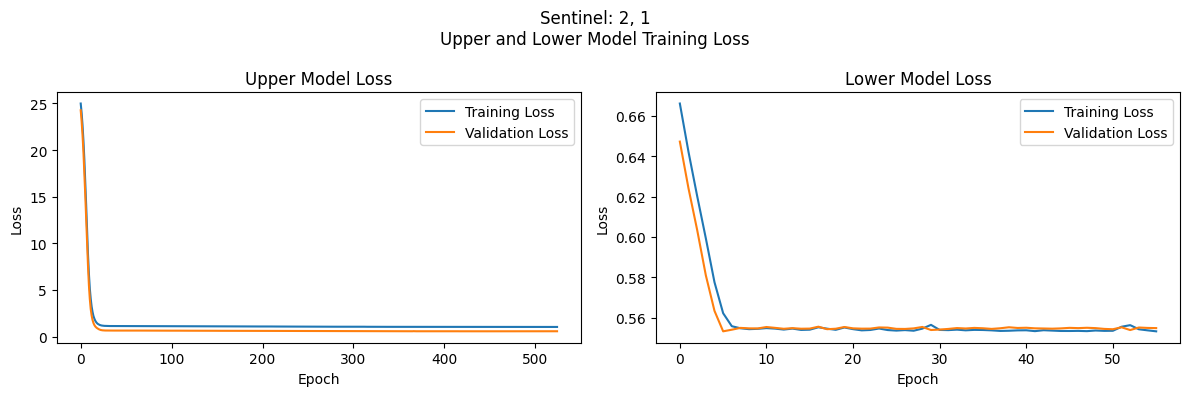

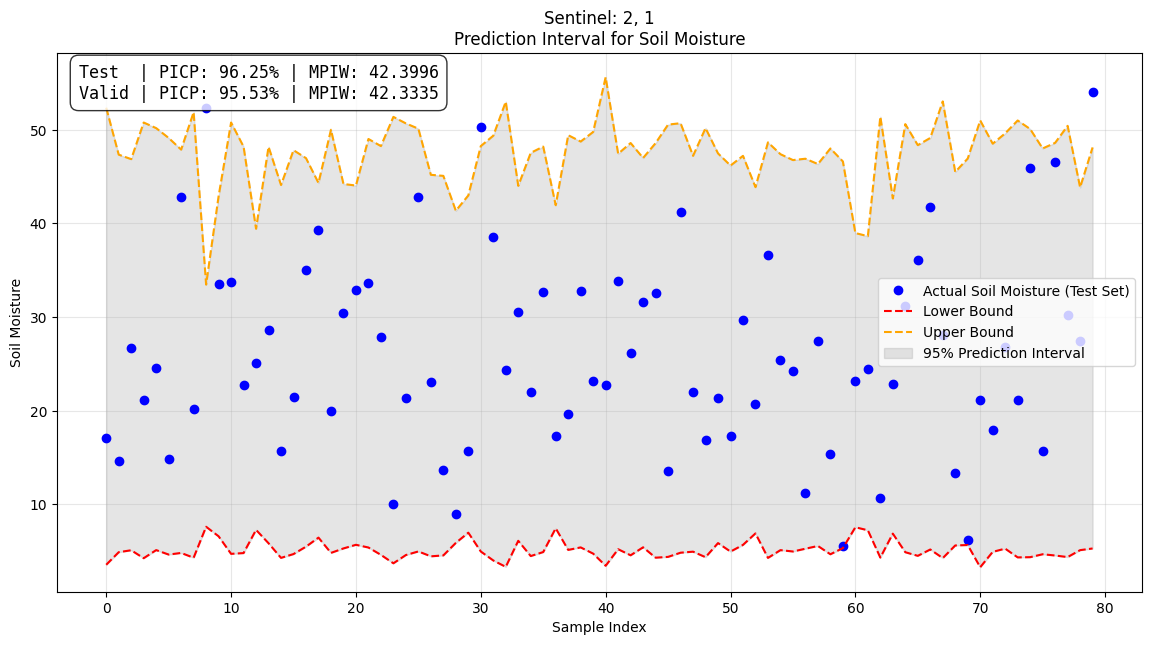

In [13]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(sentinel, features=['VH', 'VV'], target='SM', satellite='Sentinel')
exp.run_experiment(model, model_param_string='2, 1', epochs=1000)

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples
X_train shape: (537, 2)
X_test shape:  (80, 2)
y_train shape: (537,)
y_test shape:  (80,)

--------- TRAINING UPPER MODEL -----------



Epochs:  47%|████▋     | 471/1000 [00:41<00:46, 11.40epoch/s, loss=1.0211, val_loss=0.5528]



--------- TRAINING LOWER MODEL -----------



Epochs:   6%|▌         | 57/1000 [00:05<01:28, 10.69epoch/s, loss=0.5537, val_loss=0.5534]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


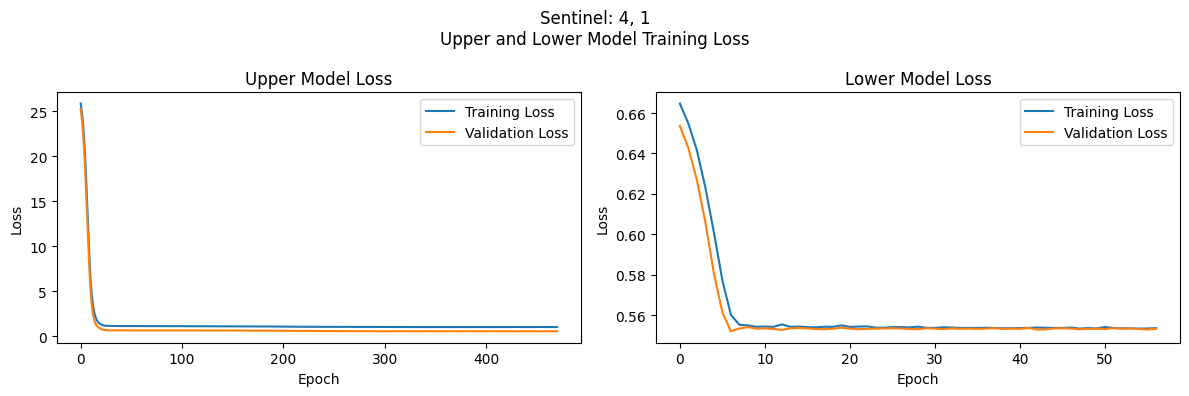

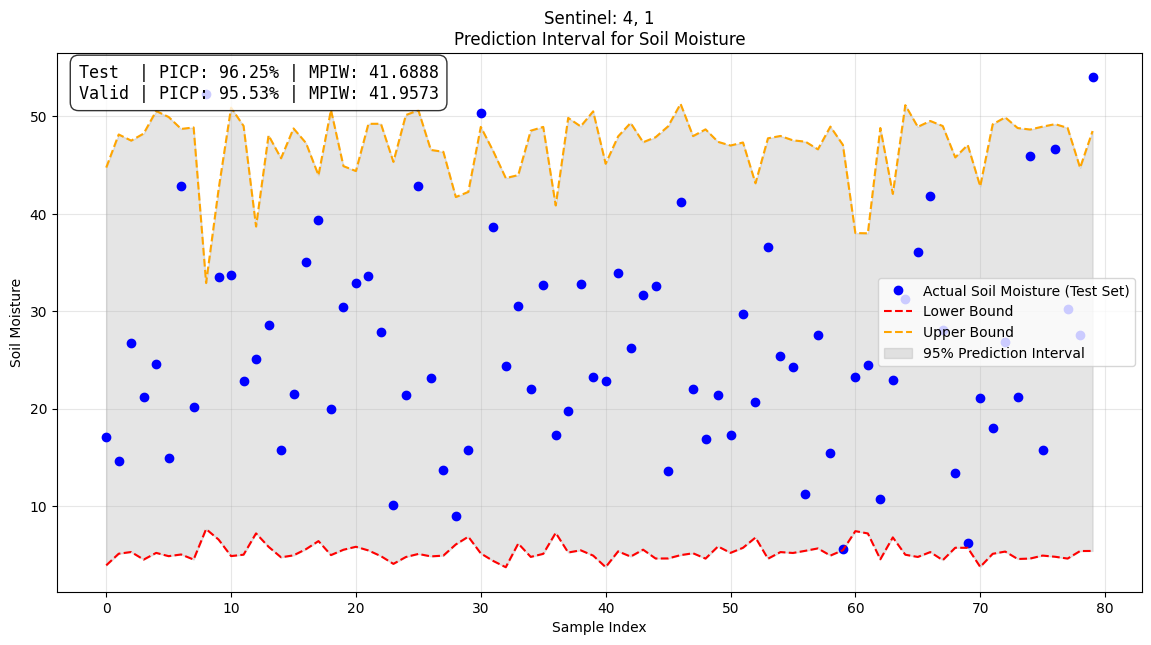

In [14]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(sentinel, features=['VH', 'VV'], target='SM', satellite='Sentinel')
exp.run_experiment(model, model_param_string='4, 1', epochs=1000)

Training set: 537 samples
Validation set: 179 samples
Test set: 80 samples
X_train shape: (537, 2)
X_test shape:  (80, 2)
y_train shape: (537,)
y_test shape:  (80,)

--------- TRAINING UPPER MODEL -----------



Epochs:  52%|█████▏    | 523/1000 [00:44<00:40, 11.81epoch/s, loss=1.0313, val_loss=0.5616]



--------- TRAINING LOWER MODEL -----------



Epochs:  20%|█▉        | 196/1000 [00:16<01:08, 11.73epoch/s, loss=0.5401, val_loss=0.5438]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


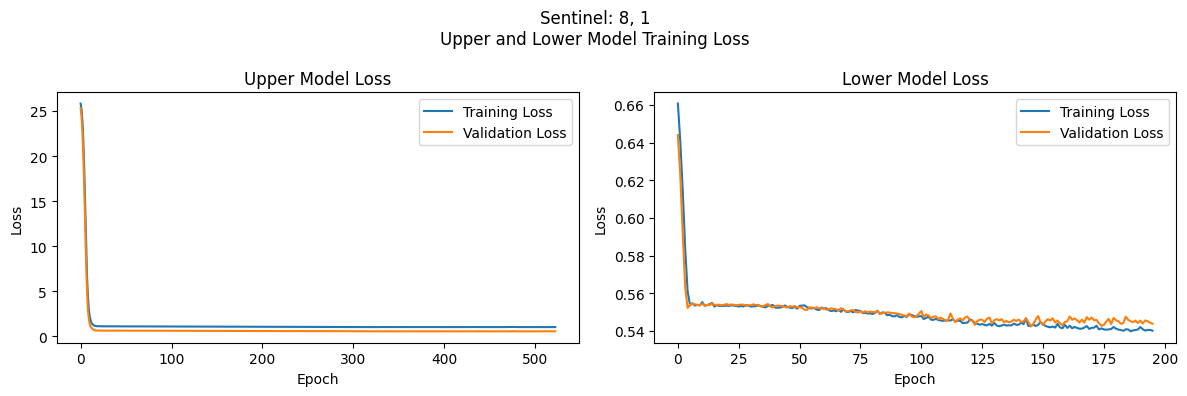

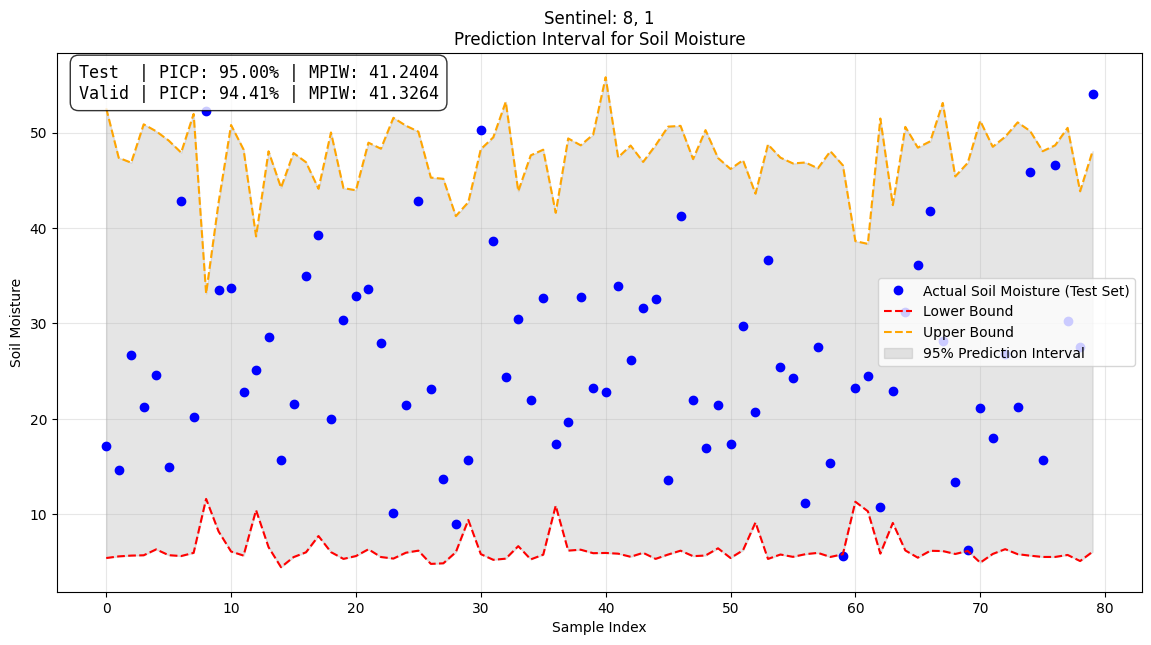

In [15]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(sentinel, features=['VH', 'VV'], target='SM', satellite='Sentinel')
exp.run_experiment(model, model_param_string='8, 1', epochs=1000)

# Both Combined

In [16]:
combined = combined[combined['SM (Combined)'] < 150]

combined

,VH,VV,Angle,SM (Sent),HH,HV,SM (EOS),SM (Combined),Unnamed: 8,Latitude (S),Longitude (S),Latitude (E),Longitude (E),Lat Diff,Long Diff,SM Diff
0,-14.947200,-10.379400,40.366800,20.6,-7.38713,-15.09099,24.4,22.50,NaN,22.526048,72.765011,22.526048,72.765011,0.000000,0.000000,-3.8
1,-16.361200,-11.299400,41.008800,25.8,-6.25740,-12.05392,41.0,33.40,NaN,22.525481,72.765028,22.525481,72.765028,0.000000,0.000000,-15.2
2,-16.168800,-10.992000,42.359800,28.9,-8.44134,-16.46069,25.3,27.10,NaN,22.525423,72.765663,22.525423,72.765663,0.000000,0.000000,3.6
3,-15.630700,-8.829090,42.982700,4.1,-2.85467,-17.00499,53.7,28.90,NaN,22.525999,72.765663,22.525999,72.765663,0.000000,0.000000,-49.6
4,-15.130900,-10.333000,41.434700,35.3,-6.88868,-12.32378,53.4,44.35,NaN,22.525563,72.765399,22.525563,72.765399,0.000000,0.000000,-18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-15.603123,-10.557852,42.709682,30.2,-8.69274,-14.15688,26.8,28.50,NaN,22.505581,72.764064,22.523640,72.766727,-0.018059,-0.002663,3.4
743,-16.321512,-11.300431,42.176147,38.3,-6.48271,-15.56076,32.8,35.55,NaN,22.505961,72.764083,22.523657,72.766016,-0.017696,-0.001933,5.5
744,-15.585269,-11.489754,42.523727,20.0,-6.20660,-14.73141,34.8,27.40,NaN,22.506133,72.763434,22.524255,72.766024,-0.018122,-0.002590,-14.8
745,-16.052544,-10.954885,42.562408,39.7,-9.43414,-20.52987,27.8,33.75,NaN,22.505784,72.763859,22.524229,72.766601,-0.018445,-0.002742,11.9


In [17]:
X_cols = ['VH', 'VV', 'HH', 'HV', 'Angle']
y_col = ['SM (Combined)']

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (502, 5)
X_test shape:  (75, 5)
y_train shape: (502,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  26%|██▌       | 258/1000 [00:21<01:02, 11.79epoch/s, loss=0.4923, val_loss=0.5908] 



--------- TRAINING LOWER MODEL -----------



Epochs:  27%|██▋       | 271/1000 [00:22<01:01, 11.86epoch/s, loss=0.4209, val_loss=0.4020]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


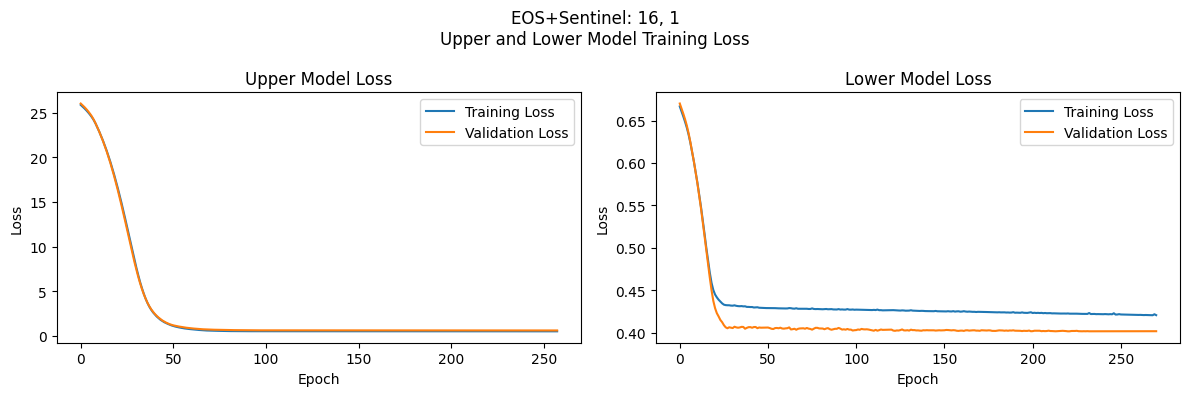

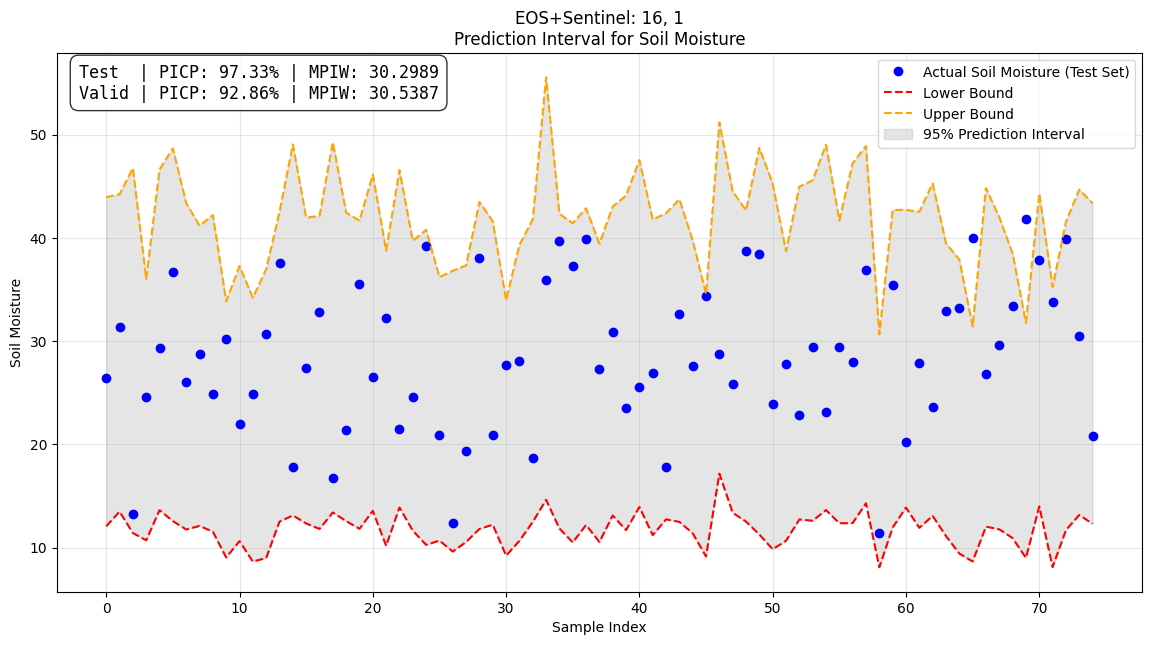

In [18]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

exp = PredictionIntervalEstimation(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel')
exp.run_experiment(model, model_param_string='16, 1', optimizer=optimizer, epochs=1000)

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (502, 5)
X_test shape:  (75, 5)
y_train shape: (502,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  25%|██▍       | 247/1000 [00:21<01:04, 11.60epoch/s, loss=0.4533, val_loss=0.5737]



--------- TRAINING LOWER MODEL -----------



Epochs:  14%|█▎        | 135/1000 [00:11<01:14, 11.64epoch/s, loss=0.4204, val_loss=0.4018]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


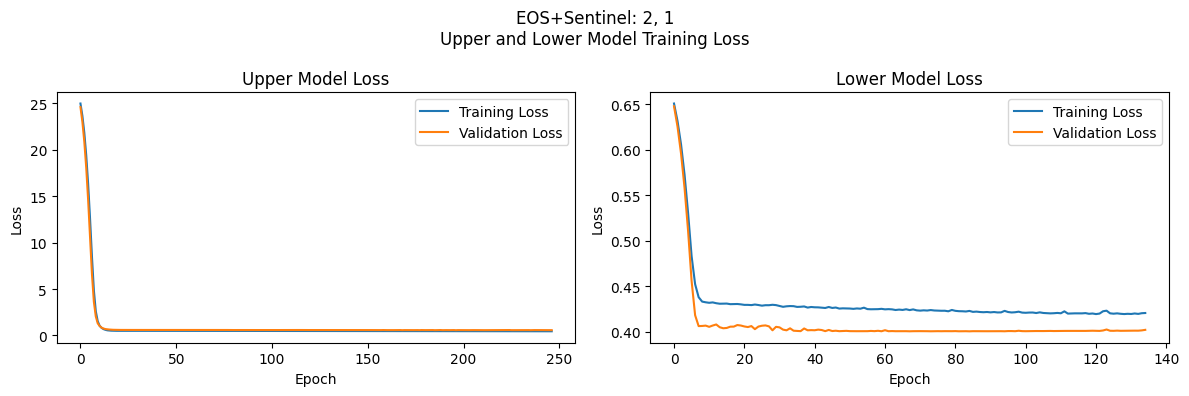

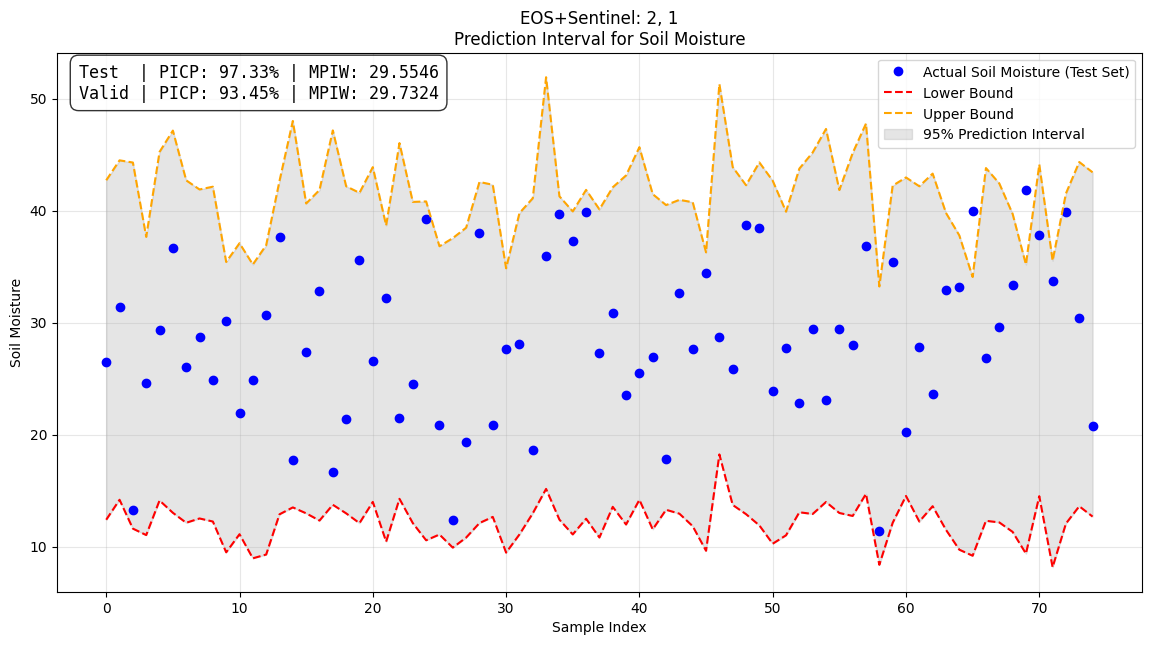

In [19]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel')
exp.run_experiment(model, model_param_string='2, 1', epochs=1000)

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (502, 5)
X_test shape:  (75, 5)
y_train shape: (502,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  29%|██▉       | 292/1000 [00:24<01:00, 11.78epoch/s, loss=0.4439, val_loss=0.5810]



--------- TRAINING LOWER MODEL -----------



Epochs:   8%|▊         | 83/1000 [00:07<01:20, 11.45epoch/s, loss=0.4213, val_loss=0.4013]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


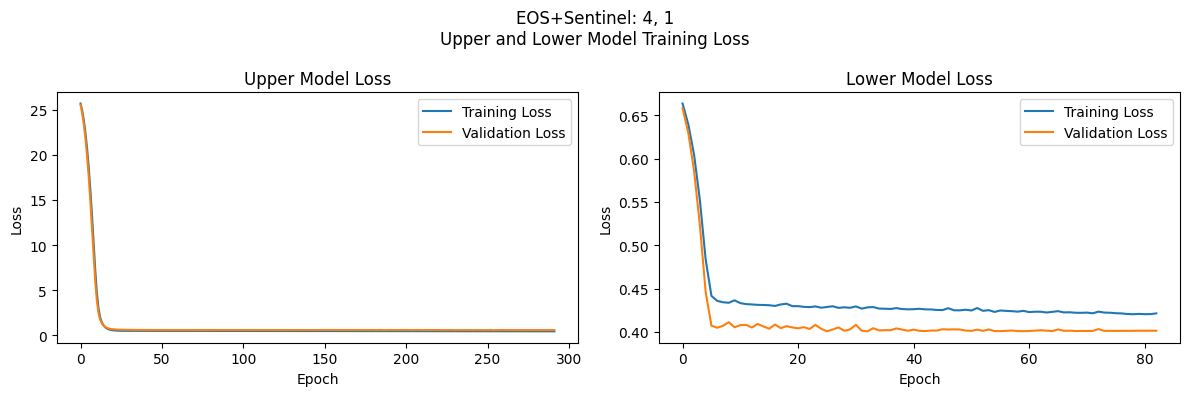

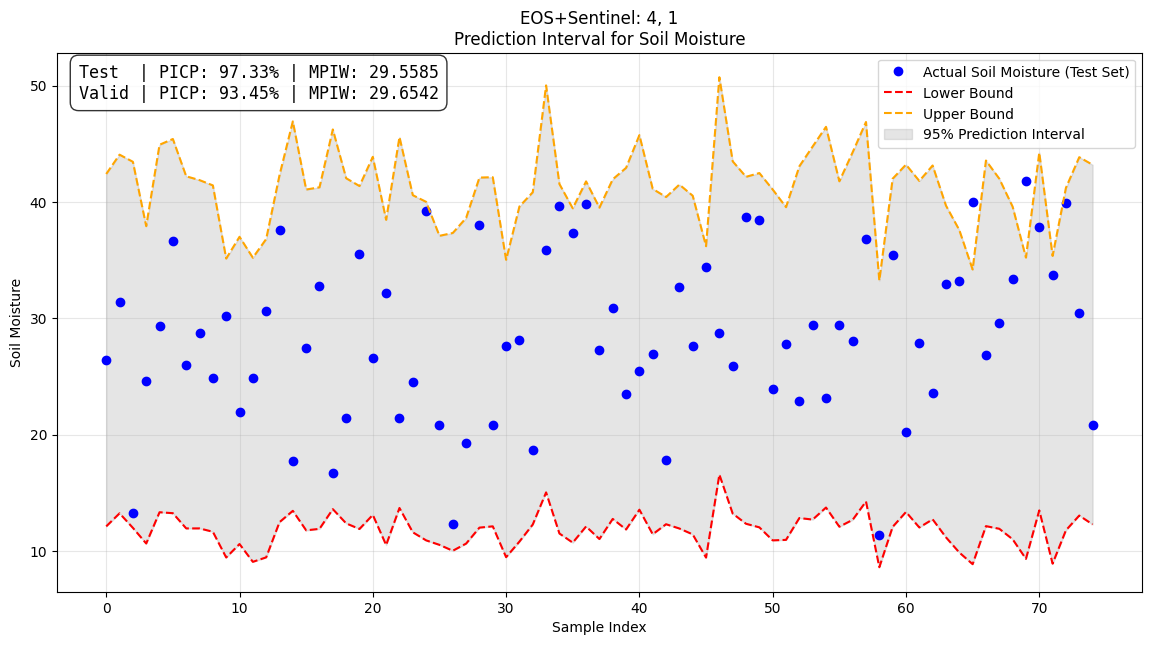

In [20]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel')
exp.run_experiment(model, model_param_string='4, 1', epochs=1000)

Training set: 502 samples
Validation set: 168 samples
Test set: 75 samples
X_train shape: (502, 5)
X_test shape:  (75, 5)
y_train shape: (502,)
y_test shape:  (75,)

--------- TRAINING UPPER MODEL -----------



Epochs:  12%|█▏        | 115/1000 [00:10<01:18, 11.34epoch/s, loss=0.4736, val_loss=0.5825]



--------- TRAINING LOWER MODEL -----------



Epochs:   7%|▋         | 68/1000 [00:06<01:22, 11.25epoch/s, loss=0.4207, val_loss=0.4021]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


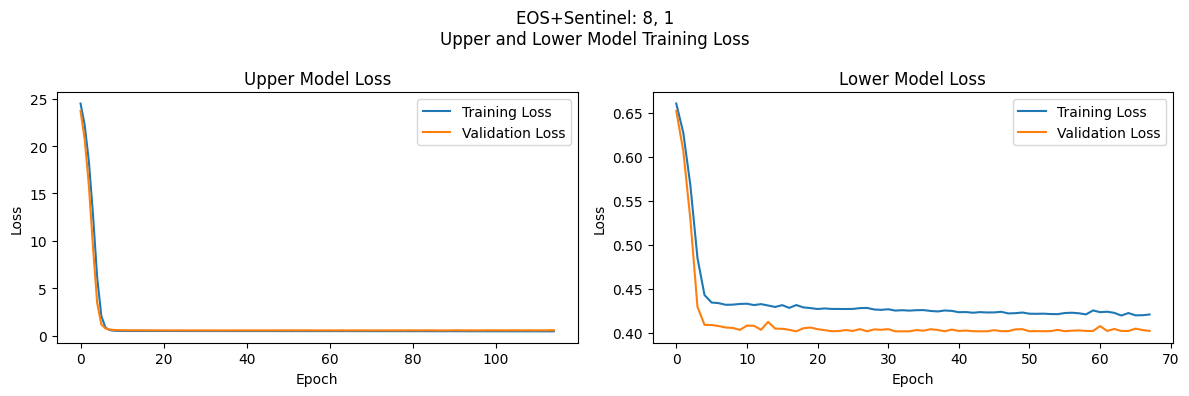

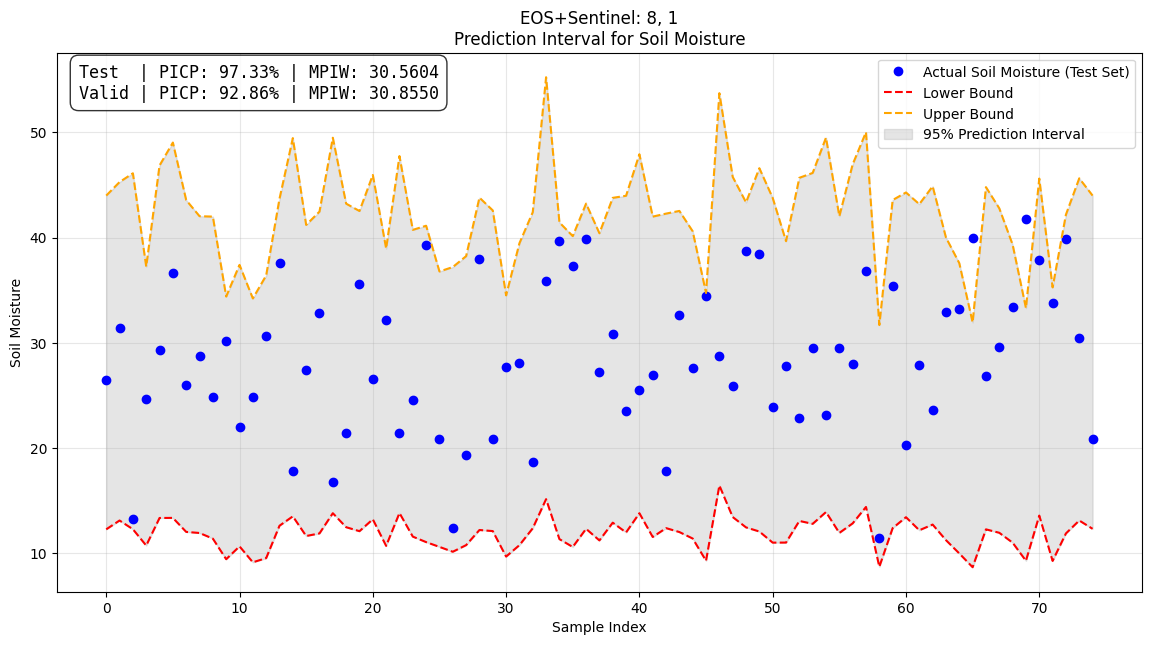

In [21]:
from model_experiments import PredictionIntervalEstimation

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(5, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

exp = PredictionIntervalEstimation(combined, features=X_cols, target=y_col[0], satellite='EOS+Sentinel')
exp.run_experiment(model, model_param_string='8, 1', epochs=1000)